In [389]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

Link Docs:
    
https://towardsdatascience.com/how-to-generate-prediction-intervals-with-scikit-learn-and-python-ab3899f992ed

In [79]:
path=sys.path[0]
path

'/home/moebius/Documents/to do/ETH_BTC_analysis'

In [80]:
df = pd.read_csv("ETH_BTC.csv")

In [81]:
df.head(1)

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1500000000,0.086593,0.086242,0.086496,0.086364,49.756855,575.645091,0.086437


In [82]:
sns.set(font_scale=.5, style="whitegrid")

### Date formatting

In [107]:
df['date'].head()

0    1500000000
1    1500000300
2    1500000600
3    1500000900
4    1500001200
Name: date, dtype: int64

In [356]:
df2 = df.copy()

In [358]:
dates = pd.Series(df['date'])
df2['date'] = pd.to_datetime(dates,unit='s')
df2['date'].head()

0   2017-07-14 02:40:00
1   2017-07-14 02:45:00
2   2017-07-14 02:50:00
3   2017-07-14 02:55:00
4   2017-07-14 03:00:00
Name: date, dtype: datetime64[ns]

### Exploratory analysis

In [174]:
cols =[col for col in df2.columns]
cols

['date',
 'high',
 'low',
 'open',
 'close',
 'volume',
 'quoteVolume',
 'weightedAverage']

In [135]:
df2.describe()

,high,low,open,close,volume,quoteVolume,weightedAverage
count,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000
mean,0.081263,0.080825,0.081049,0.081048,95.603058,1151.074874,0.081043
std,0.006316,0.006199,0.006256,0.006255,148.679217,1685.798481,0.006256
min,0.066500,0.066120,0.066340,0.066360,0.000000,0.000000,0.066389
25%,0.078591,0.078218,0.078400,0.078400,23.201172,291.656045,0.078401
50%,0.081139,0.080807,0.080980,0.080973,48.594397,609.208737,0.080976
75%,0.084000,0.083500,0.083829,0.083828,110.648419,1355.436415,0.083802
max,0.111500,0.105704,0.109314,0.109202,3490.944901,31770.501508,0.109880


(array([17360., 17364., 17368., 17372., 17376., 17379., 17383., 17387.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

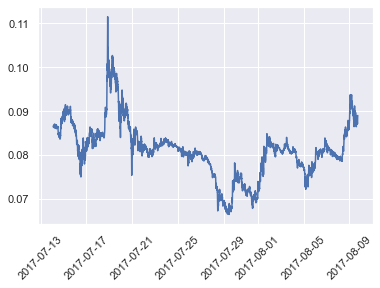

In [568]:
plt.plot(df2["date"],df2["high"])
sns.set(style="darkgrid")
plt.xticks(rotation=45)

# LINEAR MODEL

In [635]:
from sklearn.linear_model import LinearRegression

In [636]:
reg = LinearRegression().fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
score_fit = reg.score(X, y)
coefficent = reg.coef_
intercept = reg.intercept_
# Example : reg.predict(np.array([[3, 5]]))

In [638]:
print(" y = m*X + q    m: coefficent",round(float(coefficent),5)," q: intercept",round(float(intercept),7))

 y = m*X + q    m: coefficent 3e-05  q: intercept 0.0862139


In [639]:
df.columns

Index(['date', 'high', 'low', 'open', 'close', 'volume', 'quoteVolume',
       'weightedAverage'],
      dtype='object')

In [640]:
periods=[list(df2.values[i]) for i in range(len(df2['close'][:2]))]

In [641]:
df.index

RangeIndex(start=0, stop=7673, step=1)

NameError: name 'model' is not defined

In [653]:
start_buffer = 250
train_buffer = 200 # ticks for train 
period_analysis = 250
open_trade = False

#from sklearn.model_selection import train_test_split

for i in range(len(df2.values[start_buffer:])):
    X_train = np.array(df.index[i:i+period_analysis-train_buffer]).reshape(-1, 1)
    y_train = np.array(df['close'][i:i+period_analysis-train_buffer]).reshape(-1, 1)
    
    X_test = np.array(df.index[i+train_buffer:i+period_analysis]).reshape(-1, 1)
    y_test = np.array(df['close'][i+train_buffer:i+period_analysis]).reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)
    model = LinearRegression().fit(X_train, y_train)
    r_sq = model.score(X_train, y_train)
    
    coefficent = reg.coef_
    score_fit = reg.score(X_test, y_test)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # take a slice of time at the time
    #X_train = df2.index[]).reshape(-1, 1)
    #y_train = np.array(df2.close[i:i+period_analysis-train_buffer])
    
    #
    #reg = LinearRegression().fit(X_test,y_test)
    
   # X_test= np.array(df2.index[ i+train_buffer :i+period_analysis]).reshape(-1, 1)
   # y_test= np.array(df2.close[ i+train_buffer :i+period_analysis]).reshape(-1, 1)
    


    
    #print(type(score_fit),score_fit,type(coefficent),coefficent)
    if coefficent[0]<-0.6 and score_fit>0.4:
       # #open_trade=True
         print(score_fit,coefficent[0])
    #plt.plot()
        
        


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
from sklearn.model_selection import train_test_split
X = df['date']
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import random as rnd
period=90
minc=random_time=rnd.randint(0,len(df2.high.values-period))
maxc=minc+period

In [ ]:
def higvsWA(dataframe,intercept_):
    " create intercept column df['y'] "
    y_line = []
    for x in dataframe['close'].values:
        y_value =  x*coefficent + intercept_
        y_line.append(float(y_value))
    dataframe['y'] = np.array(y_line) 
    return(dataframe)

In [421]:
df2['y'] = np.array(y_line)    

### Pedicted line: high vs weightedAverage

In [446]:
X_test.shape

(2533, 1)

weightedAverage
high
y


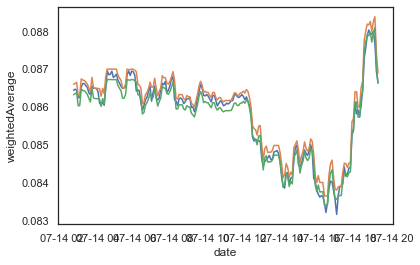

In [515]:
def plot_lines(dfataframe,x_axis,*cols):
    for col in cols:
        print(col)
        sns.lineplot(data=dfataframe[:200],x=x_axis,y=col)
        
plot_lines(df2[:200],"date","weightedAverage","close","y")


# Model 1

High vs weighted average 200

- Upper band 90%
- Lower band 10%


In [204]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5140,), (2533,), (5140,), (2533,))

In [223]:
from sklearn.ensemble import GradientBoostingRegressor# Set lower and upper quantile
LOWER_ALPHA = 0.1
UPPER_ALPHA = 0.9# Each model has to be separate


lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")

upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)